# The Rise of OTT Original Content  
## A Comparative Study of Original Content from Netflix and Amazon Prime Video
I'm a huge fan of OTT platforms! 
Over the last couple of years, they have given us some of the best & innovative content to binge-watch.     
The objective of this notebook is to collect, analyze and summarize key characteristics of Netflix and Amazon Prime Video Originals content with the goal of uncovering insights into the scale or production, content strategies, and international expansion efforts. 

## About the Dataset
 The data was web-scraped from Wikipedia pages for each category.  
 There are 6 excel sheets.

## 1. Load all dataset

There are 6 excel sheets with data about :
1. All Netflix Original Movies
2. All Netflix Original TV Shows
3. All Netflix Original Regional Movies
4. All Amazon Original Movies
5. All Amazon Original TV Shows
6. All Amazon Original Regional TV Shows

available on the respective platforms as per Wikipedia on 14th April 2023.

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt
from datetime import datetime
from collections import Counter
import re

In [3]:
folder_path = 'D:/PortfolioProjects//extracted_tables/all_master_tables/'

# read and load the excel sheets as pandas dataframe
netflix_og_films = pd.read_excel(folder_path + 'netflix_films.xlsx')
amazon_og_films = pd.read_excel(folder_path + 'amazon_films.xlsx')
netflix_og_tvshows = pd.read_excel(folder_path + 'netflix_tvshows.xlsx')
amazon_og_tvshows = pd.read_excel(folder_path + 'amazon_tvshows.xlsx')
netflix_films_regional = pd.read_excel(folder_path + 'netflix_films_regional.xlsx')
amazon_tvshows_regional = pd.read_excel(folder_path + 'amazon_tvshow_regional.xlsx')

del folder_path

## 2. Summarize the data
I am using a custom function that summarizes the contents of each column in the dataframe including unique and missing values.  
Ideally run this function once per for each dataframe to understand what kind of cleaning is needed for that dataframe.

In [4]:
# Define a function that summarizes the contents of each column in the dataframe
def dataframe_summary(df):
    """Return a Pandas dataframe describing the contents of a source dataframe."""
    variables = []
    dtypes = []
    count = []
    unique = []
    missing = []
    
    for item in df.columns:
        variables.append(item)
        dtypes.append(df[item].dtype)
        count.append(len(df[item]))
        unique.append(len(df[item].unique()))
        missing.append(df[item].isna().sum())

    output = pd.DataFrame({
        'variable': variables, 
        'dtype': dtypes,
        'count': count,
        'unique': unique,
        'missing': missing,
    })    
        
    return output

missing_rows = dataframe_summary(netflix_films_regional)
print('Summarizing Netflix regional films dataframe:\n', missing_rows)

Summarizing Netflix regional films dataframe:
                    variable   dtype  count  unique  missing
0                     Title  object    509     509        0
1                  Premiere  object    509     383       51
2                     Genre  object    509      89        0
3                   Runtime  object    509      94        0
4  Netflix exclusive region  object    509     125        0
5                  Language  object    509      36        0


## 3. Clean the data
Clean data is the best data.  
Now that we know what each dataframe & it's columns is about,
we will check for any inaccuracies, inconsistencies, and duplicates.

In [5]:
# Let's first look for any duplicate rows
duplicate_rows = amazon_og_films.groupby(["Title", "Language"]).filter(lambda x: len(x) > 1).sort_values(by="Title")
print(duplicate_rows)

                       Title            Genre           Premiere Language
68                      Ammu   Thriller drama   October 19, 2022   Telugu
178                     Ammu   Thriller drama   October 19, 2022   Telugu
160                     Bali           Horror   December 9, 2021  Marathi
58                      Bali           Horror   December 9, 2021  Marathi
98   Bheemasena Nalamaharaja    Drama Romance   October 29, 2020  Kannada
..                       ...              ...                ...      ...
109                 Unpaused        Anthology  December 18, 2020    Hindi
89                         V  Action Thriller  September 5, 2020   Telugu
9                          V  Action thriller  September 5, 2020   Telugu
119           Well Done Baby     Family drama      April 9, 2021  Marathi
30            Well Done Baby     Family drama      April 9, 2021  Marathi

[112 rows x 4 columns]


### Delete the duplicate rows
We found duplicate rows in *amazon_og_tvshows* and *amazon_og_films*.  
Let's remove those rows.

In [6]:
# remove duplicate rows
amazon_og_tvshows.drop_duplicates(subset=["Title"], inplace=True)
amazon_og_films.drop_duplicates(subset=["Title"], inplace=True)

### Format the date column
Some enteries in the *'Premiere'* column are **string** type, while others are **datetime.datetime**  
*netflix_films_regional* also has some missing values.

In [7]:
# modify the 'Premiere' column to store date values in datetime format
# This is crucial for time series analysis
mask = amazon_og_films['Premiere'].apply(lambda x: isinstance(x, str))
amazon_og_films.loc[mask, 'Premiere'] = pd.to_datetime(amazon_og_films.loc[mask, 'Premiere'], format='%B %d, %Y')

amazon_og_films['Year'] = amazon_og_films['Premiere'].apply(lambda x: 
                                                            x.year if isinstance(x, pd.Timestamp) else x.year)
amazon_og_films['Month'] = amazon_og_films['Premiere'].apply(lambda x: 
                                                            x.month if isinstance(x, pd.Timestamp) else x.month)

# fix rows with inconsistent format
amazon_og_tvshows.iloc[24, 2] = 'February 10, 2023'
amazon_og_tvshows.iloc[25, 2] = 'April 7, 2023'

mask = amazon_og_tvshows['Premiere'].apply(lambda x: isinstance(x, str))
amazon_og_tvshows.loc[mask, 'Premiere'] = pd.to_datetime(amazon_og_tvshows.loc[mask, 'Premiere'], format='%B %d, %Y')

amazon_og_tvshows['Year'] = amazon_og_tvshows['Premiere'].apply(lambda x: 
                                                            x.year if isinstance(x, pd.Timestamp) else x.year)
amazon_og_tvshows['Month'] = amazon_og_tvshows['Premiere'].apply(lambda x: 
                                                            x.month if isinstance(x, pd.Timestamp) else x.month)


mask = amazon_tvshows_regional['Premiere'].apply(lambda x: isinstance(x, str))
amazon_tvshows_regional.loc[mask, 'Premiere'] = pd.to_datetime(amazon_tvshows_regional.loc[mask, 'Premiere'], format='%B %d, %Y')

amazon_tvshows_regional['Year'] = amazon_tvshows_regional['Premiere'].apply(lambda x: 
                                                            x.year if isinstance(x, pd.Timestamp) else x.year)
amazon_tvshows_regional['Month'] = amazon_tvshows_regional['Premiere'].apply(lambda x: 
                                                            x.month if isinstance(x, pd.Timestamp) else x.month)

In [ ]:
mask = netflix_og_films['Premiere'].apply(lambda x: isinstance(x, str))
netflix_og_films.loc[mask, 'Premiere'] = pd.to_datetime(netflix_og_films.loc[mask, 'Premiere'], format='%B %d, %Y')

netflix_og_films['Year'] = netflix_og_films['Premiere'].apply(lambda x: 
                                                            x.year if isinstance(x, pd.Timestamp) else x.year)
netflix_og_films['Month'] = netflix_og_films['Premiere'].apply(lambda x: 
                                                            x.month if isinstance(x, pd.Timestamp) else x.month)


mask = netflix_og_tvshows['Premiere'].apply(lambda x: isinstance(x, str))
netflix_og_tvshows.loc[mask, 'Premiere'] = pd.to_datetime(netflix_og_tvshows.loc[mask, 'Premiere'], format='%B %d, %Y')

netflix_og_tvshows['Year'] = netflix_og_tvshows['Premiere'].apply(lambda x: 
                                                            x.year if isinstance(x, pd.Timestamp) else x.year)
netflix_og_tvshows['Month'] = netflix_og_tvshows['Premiere'].apply(lambda x: 
                                                            x.month if isinstance(x, pd.Timestamp) else x.month)


#drop NaN rows - 51 rows did not have any date information
netflix_films_regional_bydate = netflix_films_regional.dropna(subset=['Premiere'])

netflix_films_regional_bydate['Premiere'] = pd.to_datetime(netflix_films_regional_bydate['Premiere'], format='%B %d, %Y')
netflix_films_regional_bydate['Year'] = netflix_films_regional_bydate['Premiere'].dt.year
netflix_films_regional_bydate['Month'] = netflix_films_regional_bydate['Premiere'].dt.month

## 4. Analyze & Summarize the main characteristics from the data

### a. Content Distribution

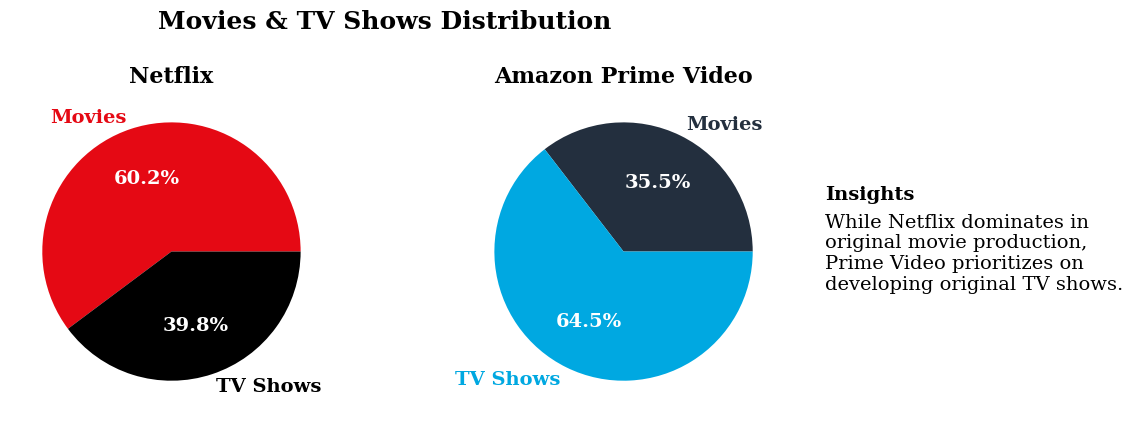

In [9]:
labels = ['Movies', 'TV Shows']
colors1 = ['#E50914', 'black']
colors2 = ['#232F3E', '#00a8e1']

# Define a function to create a pie chart with the given values and title
def create_pie_chart(values, title, ax, colors):
    wedges, texts, autotexts = ax.pie(values, labels=labels, colors=colors, autopct='%1.1f%%')
    ax.set_title(title, fontfamily='serif', fontsize=16, fontweight='bold')
    for autotext in autotexts:
        autotext.set_fontfamily('serif')
        autotext.set_fontsize(14)
        autotext.set_fontweight('bold')
        autotext.set_color('white')
    for text in texts:
        text.set_fontfamily('serif')
        text.set_fontsize(14)
        text.set_fontweight('bold')
        if(text.get_text() =='Movies'):
            text.set_color(colors[0])
        else:
            text.set_color(colors[1])

# Create the subplots and call the create_pie_chart function for each subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
create_pie_chart([netflix_og_films.shape[0] + netflix_films_regional.shape[0], netflix_og_tvshows.shape[0]], 'Netflix', ax1, colors1)
create_pie_chart([amazon_og_films.shape[0], amazon_og_tvshows.shape[0] + amazon_tvshows_regional.shape[0]], 'Amazon Prime Video', ax2, colors2)

# Set the suptitle and show the figure
fig.suptitle('Movies & TV Shows Distribution', fontfamily='serif', fontsize=18, fontweight='bold')
fig.text(0.94, 0.60, "Insights", fontfamily='serif', fontweight='bold', fontsize=14)
fig.text(0.94, 0.42, 
         '''While Netflix dominates in 
original movie production,
Prime Video prioritizes on 
developing original TV shows. ''',  fontfamily='serif', fontsize=14)
fig.subplots_adjust(wspace=0.4)
plt.show()

del fig, ax1, ax2, labels, colors1, colors2


Netflix and Amazon Prime Video have distinct priorities when it comes to content types.    
Let's compare the content output of Netflix and Amazon Prime Video directly to determine which platform is producing more. 


### b. Volume of Content

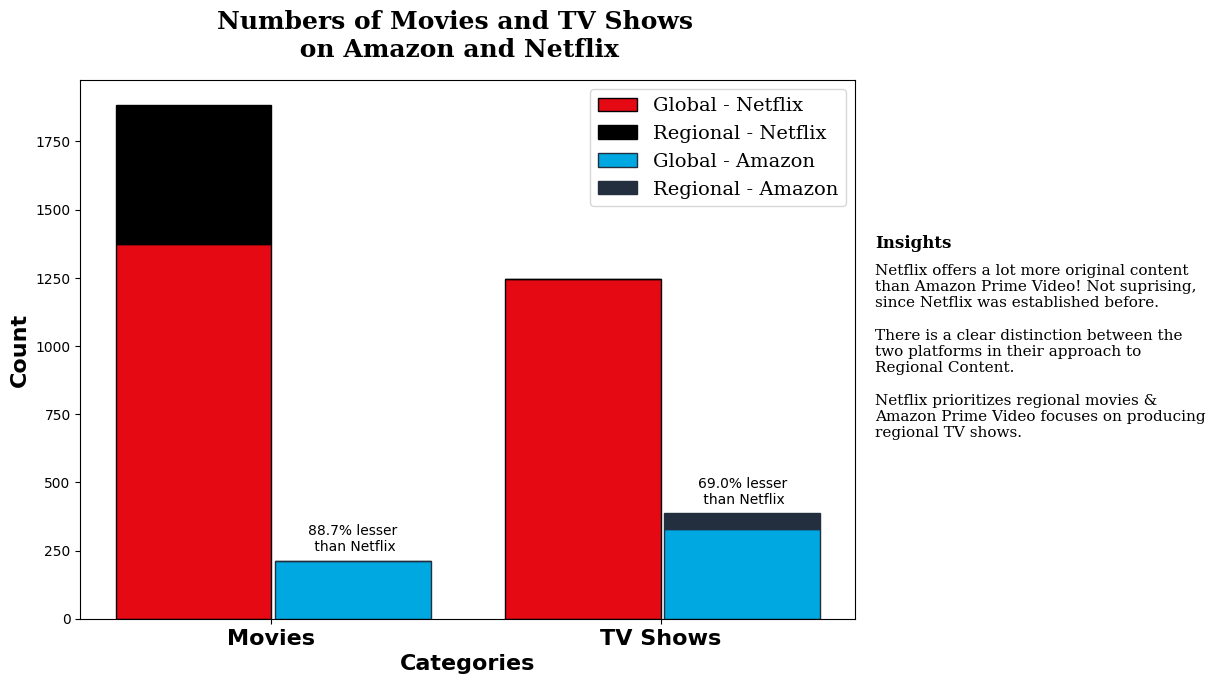

In [10]:
# prepare data for visualization
netflix_df = pd.DataFrame({
    'category': ['Movies', 'TV Shows'],
    'Global': [netflix_og_films.shape[0], netflix_og_tvshows.shape[0]],
    'Regional': [netflix_films_regional.shape[0], 0]
})
amazon_df = pd.DataFrame({
    'category': ['Movies', 'TV Shows'],
    'Global': [amazon_og_films.shape[0], amazon_og_tvshows.shape[0]],
    'Regional': [0, amazon_tvshows_regional.shape[0]]
})

netflix_df['Total'] = netflix_df['Global'] + netflix_df['Regional']
amazon_df['Total'] = amazon_df['Global'] + amazon_df['Regional']
diff_df = [100 * (netflix_df['Total'][0] - amazon_df['Total'][0])/netflix_df['Total'][0],
           100 * (netflix_df['Total'][1] - amazon_df['Total'][1])/netflix_df['Total'][1]]

plt.figure(figsize=(10, 7))
# Set the width of each bar and the spacing between the bars
barWidth = 0.20
spaceWidth = 0.005
# Create a list of x positions for each group and category
x_netflix = [0, 0.5]
x_amazon = [x + barWidth + spaceWidth for x in x_netflix]

# Create the bar chart for Netflix data
plt.bar(x_netflix, netflix_df['Global'], color='#E50914', width=barWidth, edgecolor = "black", label='Global - Netflix')
plt.bar(x_netflix, netflix_df['Regional'], bottom=netflix_df['Global'], 
color='black', edgecolor = 'black', width=barWidth, label='Regional - Netflix')

# Create the bar chart for Amazon data
plt.bar(x_amazon, amazon_df['Global'], color='#00a8e1', width=barWidth, edgecolor = '#232F3E', label='Global - Amazon')
plt.text(x_amazon[0], amazon_df['Global'][0] + 80, f"{round(diff_df[0],1)}% lesser\n than Netflix", ha='center', va='center')
plt.bar(x_amazon, amazon_df['Regional'], bottom=amazon_df['Global'], 
color='#232F3E', edgecolor = '#232F3E', width=barWidth, label='Regional - Amazon')
plt.text(x_amazon[1], amazon_df['Global'][1] + amazon_df['Regional'][1] + 80, f"{round(diff_df[1],1)}% lesser\n than Netflix", ha='center', va='center')

# Add labels and ticks
plt.rcParams['font.family'] = 'serif'
plt.xlabel('Categories', fontsize=16, fontweight='bold')
plt.ylabel('Count', fontsize=16, fontweight='bold')
plt.suptitle('Numbers of Movies and TV Shows\n on Amazon and Netflix', fontsize=18, fontweight='bold')
plt.xticks([0.1, 0.6], netflix_df['category'], fontsize=16, fontweight='bold')
plt.legend(fontsize=14)

fig = plt.gcf()
fig.text(0.92, 0.64, "Insights", fontsize=12, fontweight='bold' )
fig.text(0.92, 0.37,
         '''Netflix offers a lot more original content
than Amazon Prime Video! Not suprising, 
since Netflix was established before.

There is a clear distinction between the
two platforms in their approach to 
Regional Content.

Netflix prioritizes regional movies & 
Amazon Prime Video focuses on producing 
regional TV shows.''', fontsize=11)

plt.show()

del barWidth, spaceWidth, x_netflix, x_amazon, netflix_df, amazon_df, diff_df, fig

I am surprised by the significant disparity in the amount of content between the two platforms.  
I'm now intrigued to explore how the rate of content addition has differed over the years for Netflix and Amazon Prime Video.

### c. Rate of Content Addition

In [11]:
all_tvshows_amazon = pd.concat([amazon_og_tvshows, amazon_tvshows_regional], join='outer')
# netflix_films_regional_bydate does not include the 51 rows with missing dates
all_movies_netflix = pd.concat([netflix_og_films, netflix_films_regional_bydate], join='outer')

In [12]:
n_movies_by_year = all_movies_netflix.groupby(["Year"])["Title"].count()
n_tvshows_by_year = netflix_og_tvshows.groupby(["Year"])["Title"].count()
a_movies_by_year = amazon_og_films.groupby(["Year"])["Title"].count()
a_tvshows_by_year = all_tvshows_amazon.groupby(["Year"])["Title"].count()

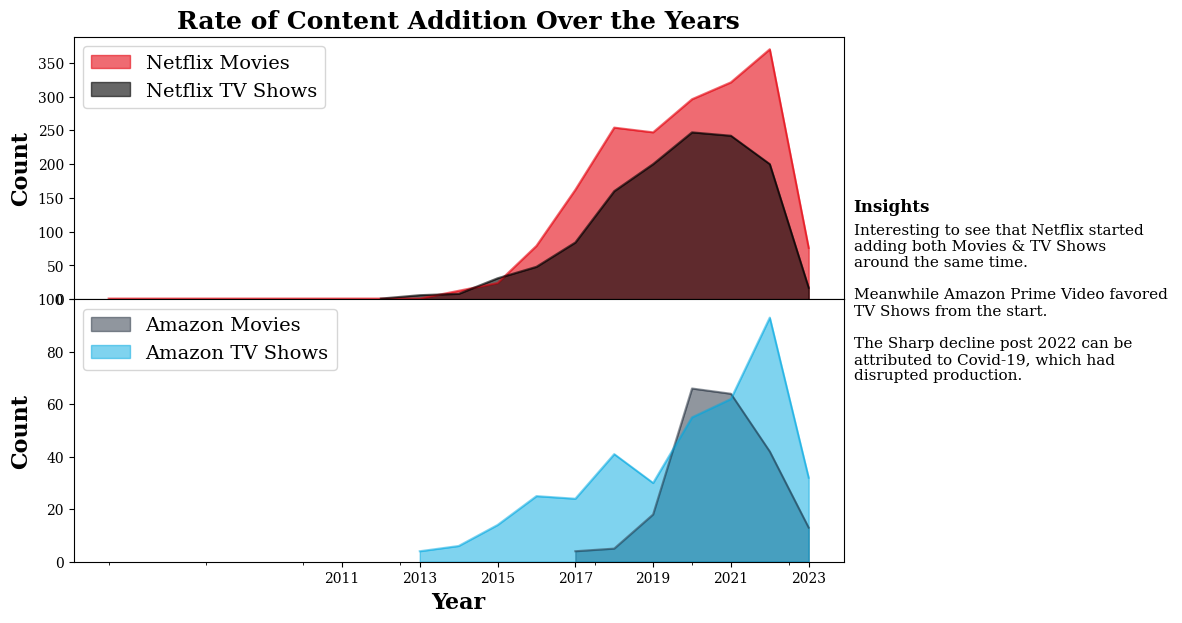

In [44]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 7), sharex=True)

n_movies_by_year.plot(kind='area', x='year', y='Title', label='Netflix Movies', color='#E50914', alpha=0.6, ax=ax1)
n_tvshows_by_year.plot(kind='area', x='year', y='Title', label='Netflix TV Shows', color='black', alpha=0.6, ax=ax1)

ax1.set_title('Rate of Content Addition Over the Years', fontsize=18, fontweight='bold')
ax1.legend(fontsize=14)
ax1.set_ylabel('Count', fontsize=16, fontweight='bold')

a_movies_by_year.plot(kind='area', x='year', y='Title', label='Amazon Movies', color='#232F3E', alpha=0.5, ax=ax2)
a_tvshows_by_year.plot(kind='area', x='year', y='Title', label='Amazon TV Shows',color='#00A8E1', alpha=0.5, ax=ax2)

ax2.legend(fontsize=14, loc='upper left')
ax2.set_xlabel('Year', fontsize=16, fontweight='bold')
ax2.set_ylabel('Count', fontsize=16, fontweight='bold')
ax2.set_ylim([0, 100])
# ax2.invert_yaxis()
plt.subplots_adjust(hspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
plt.xticks(range(2011, 2024, 2))

fig.text(0.96, 0.60, "Insights", fontsize=12, fontweight='bold' )
fig.text(0.96, 0.36,
         '''Interesting to see that Netflix started
adding both Movies & TV Shows 
around the same time.

Meanwhile Amazon Prime Video favored 
TV Shows from the start.

The Sharp decline post 2022 can be 
attributed to Covid-19, which had 
disrupted production.''', fontsize=11)

plt.show()


### d. Top Genres

In [46]:
all_movies_netflix = pd.concat([netflix_og_films, netflix_films_regional], join='outer')
genre_netflix_films = all_movies_netflix['Genre'].tolist()
genre_netflix_films = [s.strip().title() for s in genre_netflix_films]

genre_netflix_tvshows = netflix_og_tvshows['Genre'].tolist()
genre_netflix_tvshows = [s.strip().title() for s in genre_netflix_tvshows]

genre_amazon_films = amazon_og_films['Genre'].tolist()
genre_amazon_films = [s.strip().title() for s in genre_amazon_films]

genre_amazon_tvshows = all_tvshows_amazon['Genre'].tolist()
genre_amazon_tvshows = [s.strip().title() for s in genre_amazon_tvshows]

# Define a fucntion to count the frequency of each word
def wordCounter(listofgenres):
    word_counts = Counter()
    for string in listofgenres:
        words = re.findall(r'[a-zA-Z]+(?:-[a-zA-Z]+)*', string)
        for word in words:
            word_counts[word.strip()] += 1
    
    data = []
    for word, count in word_counts.items():
        data.append({'genre': word, 'count': count})
    
    return data

In [47]:
# For this analysis, we are splitting sub-genres and consider each as a single genre
output = wordCounter(genre_netflix_films)
netflix1 = pd.DataFrame(output).sort_values(by='count', ascending=False)
netflix1 = netflix1.rename(columns={'count': 'film_count'})
output = wordCounter(genre_netflix_tvshows)
netflix2 = pd.DataFrame(output).sort_values(by='count', ascending=False)
netflix2 = netflix2.rename(columns={'count': 'tv_count'})

popular_genre_netflix = pd.merge(netflix1, netflix2, on='genre', how='outer')

output = wordCounter(genre_amazon_films)
amazon1 = pd.DataFrame(output).sort_values(by='count', ascending=False)
amazon1 = amazon1.rename(columns={'count': 'film_count'})
output = wordCounter(genre_amazon_tvshows)
amazon2 = pd.DataFrame(output).sort_values(by='count', ascending=False)
amazon2 = amazon2.rename(columns={'count': 'tv_count'})

popular_genre_amazon = pd.merge(amazon1, amazon2, on='genre', how='outer')

del output, genre_amazon_films, genre_amazon_tvshows, genre_netflix_films, genre_netflix_tvshows
del netflix1, netflix2, amazon1, amazon2

In [48]:
# Prepare data for visualization of 10 most popular genres in each group
# popular_genre_netflix = popular_genre_netflix.dropna(subset=['tv_count', 'film_count'])
netflix_film = popular_genre_netflix.sort_values(by='film_count', ascending=False).reset_index(drop=True).head(10)
del netflix_film['tv_count']
netflix_tv = popular_genre_netflix.sort_values(by='tv_count', ascending=False).reset_index(drop=True).head(10)
del netflix_tv['film_count']
netflix_data = pd.merge(netflix_film, netflix_tv, on='genre', how='outer')

del netflix_film, netflix_tv

# popular_genre_amazon = popular_genre_amazon.dropna(subset=['tv_count', 'film_count'])
amazon_film = popular_genre_amazon.sort_values(by='film_count', ascending=False).reset_index(drop=True).head(10)
del amazon_film['tv_count']
amazon_tv = popular_genre_amazon.sort_values(by='tv_count', ascending=False).reset_index(drop=True).head(10)
del amazon_tv['film_count']
amazon_data = pd.merge(amazon_film, amazon_tv, on='genre', how='outer')

del amazon_film, amazon_tv

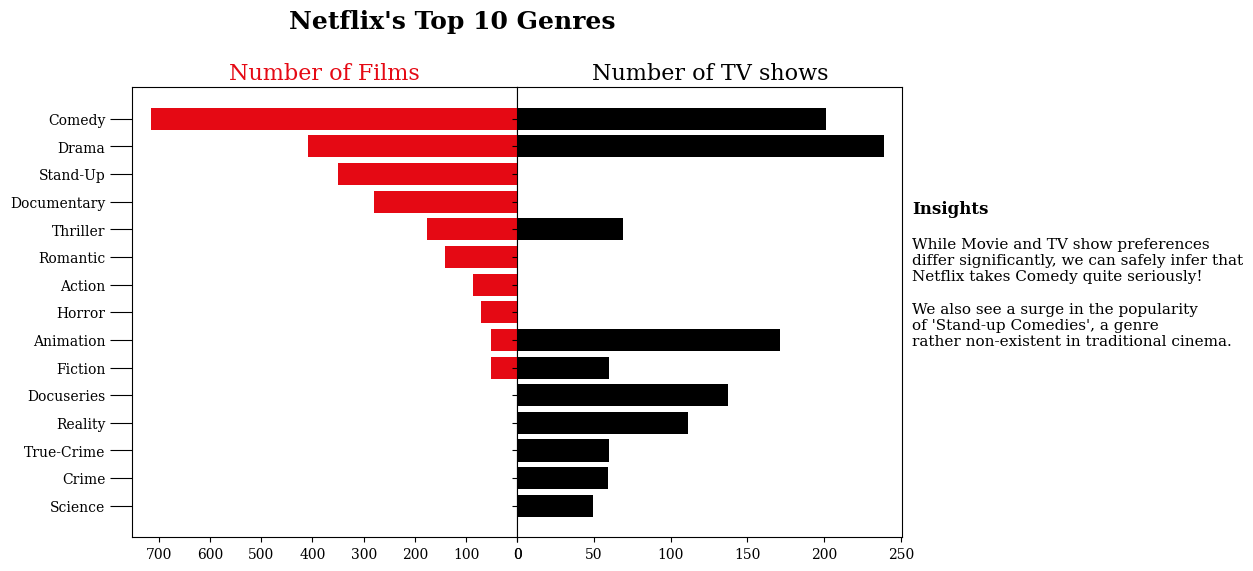

In [17]:
fig, axes = plt.subplots(figsize=(10,6), ncols=2, sharey=True)

index = netflix_data.index
n_col0 = netflix_data['film_count']
n_col1 = netflix_data['tv_count']

axes[0].set(yticks=netflix_data.index, yticklabels=netflix_data.genre)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='black', size=16)

axes[0].barh(index, n_col0, align='center', color='#E50914', zorder=10)
axes[0].set_title('Number of Films', fontsize=16, color='#E50914')
axes[1].barh(index, n_col1, align='center', color='black', zorder=10)
axes[1].set_title('Number of TV shows', fontsize=16, color='black')

axes[0].invert_xaxis() 
plt.gca().invert_yaxis()
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
plt.rcParams['font.family'] = 'serif'

fig.suptitle("Netflix's Top 10 Genres", fontsize=18, fontweight='bold', color='black', ha='center')
fig.text(0.96, 0.64, "Insights", fontsize=12, fontweight='bold' )
fig.text(0.96, 0.42,
         '''While Movie and TV show preferences 
differ significantly, we can safely infer that
Netflix takes Comedy quite seriously!

We also see a surge in the popularity 
of 'Stand-up Comedies', a genre
rather non-existent in traditional cinema. ''', fontsize=11)

del index, n_col0, n_col1, fig, axes

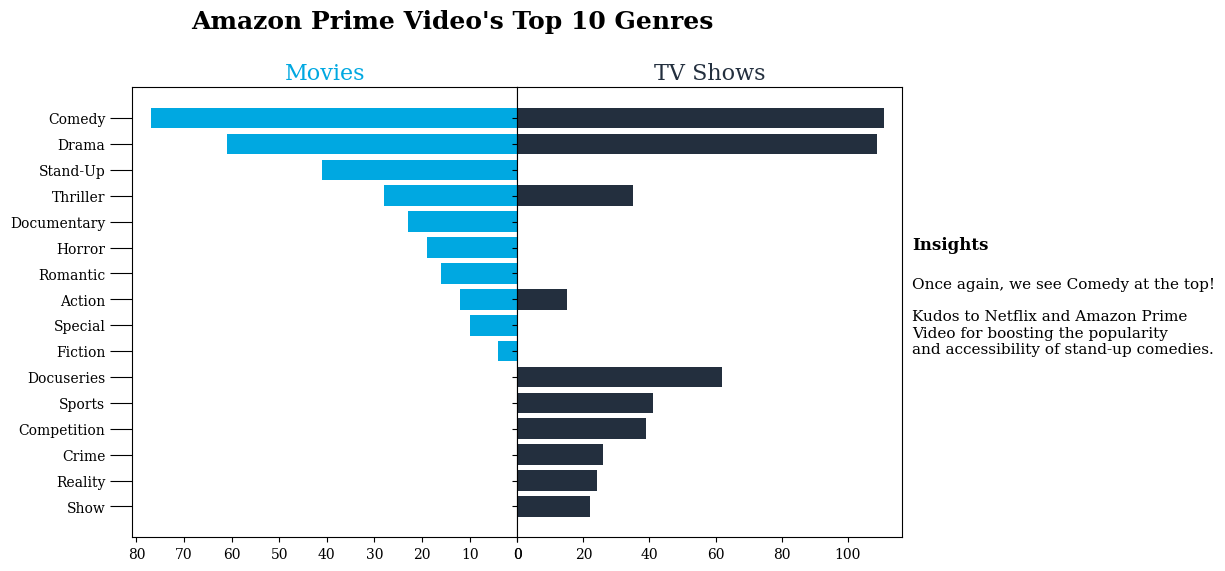

In [57]:
fig, axes = plt.subplots(figsize=(10,6), ncols=2, sharey=True)

index_amazon = amazon_data.index
a_col0 = amazon_data['film_count']
a_col1 = amazon_data['tv_count']

axes[0].set(yticks=amazon_data.index, yticklabels=amazon_data.genre)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='black', size=16)

axes[0].barh(index_amazon, a_col0, align='center', color='#00A8E1')
axes[0].set_title('Movies', fontsize=16, color='#00A8E1')
axes[1].barh(index_amazon, a_col1, align='center', color='#232F3E')
axes[1].set_title('TV Shows', fontsize=16, color='#232F3E')

axes[0].invert_xaxis()
plt.gca().invert_yaxis()

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
plt.rcParams['font.family'] = 'serif'

fig.suptitle("Amazon Prime Video's Top 10 Genres", fontsize=18, fontweight='bold', color='black', ha='center')
fig.text(0.96, 0.58, "Insights", fontsize=12, fontweight='bold' )
fig.text(0.96, 0.38,
         '''Once again, we see Comedy at the top!

Kudos to Netflix and Amazon Prime
Video for boosting the popularity
and accessibility of stand-up comedies.
''', fontsize=11)

del index_amazon, a_col0, a_col1, fig, axes

Shout out to both Netflix & Amazon Prime Video for making 'Stand-up comedies' so popular & accessible.

### e. Top Languages

In [59]:
language_netflix_films = all_movies_netflix['Language'].tolist()
language_netflix_films = [s.strip().title() for s in language_netflix_films]

language_netflix_tvshows = netflix_og_tvshows['Language'].tolist()
language_netflix_tvshows = [s.strip().title() for s in language_netflix_tvshows]

language_amazon_films = amazon_og_films['Language'].tolist()
language_amazon_films = [s.strip().title() for s in language_amazon_films]

language_amazon_tvshows = all_tvshows_amazon['Language'].tolist()
language_amazon_tvshows = [s.strip().title() for s in language_amazon_tvshows]

In [60]:
# For this analysis, we are splitting sub-Languages and consider each as a single Language
output = wordCounter(language_netflix_films)
netflix1 = pd.DataFrame(output).sort_values(by='count', ascending=False)
netflix1 = netflix1.rename(columns={'count': 'film_count', 'genre':'language'})

output = wordCounter(language_netflix_tvshows)
netflix2 = pd.DataFrame(output).sort_values(by='count', ascending=False)
netflix2 = netflix2.rename(columns={'count': 'tv_count', 'genre':'language'})

popular_language_netflix = pd.merge(netflix1, netflix2, on='language', how='outer')

output = wordCounter(language_amazon_films)
amazon1 = pd.DataFrame(output).sort_values(by='count', ascending=False)
amazon1 = amazon1.rename(columns={'count': 'film_count', 'genre':'language'})
output = wordCounter(language_amazon_tvshows)
amazon2 = pd.DataFrame(output).sort_values(by='count', ascending=False)
amazon2 = amazon2.rename(columns={'count': 'tv_count', 'genre':'language'})

popular_language_amazon = pd.merge(amazon1, amazon2, on='language', how='outer')

del output, language_amazon_films, language_amazon_tvshows, language_netflix_films, language_netflix_tvshows
del netflix1, netflix2, amazon1, amazon2

In [61]:
netflix_film = popular_language_netflix.sort_values(by='film_count', ascending=False).reset_index(drop=True).head(10)
del netflix_film['tv_count']
netflix_tv = popular_language_netflix.sort_values(by='tv_count', ascending=False).reset_index(drop=True).head(10)
del netflix_tv['film_count']
netflix_data = pd.merge(netflix_film, netflix_tv, on='language', how='outer')

del netflix_film, netflix_tv

amazon_film = popular_language_amazon.sort_values(by='film_count', ascending=False).reset_index(drop=True).head(10)
del amazon_film['tv_count']
amazon_tv = popular_language_amazon.sort_values(by='tv_count', ascending=False).reset_index(drop=True).head(10)
del amazon_tv['film_count']
amazon_data = pd.merge(amazon_film, amazon_tv, on='language', how='outer')

del amazon_film, amazon_tv

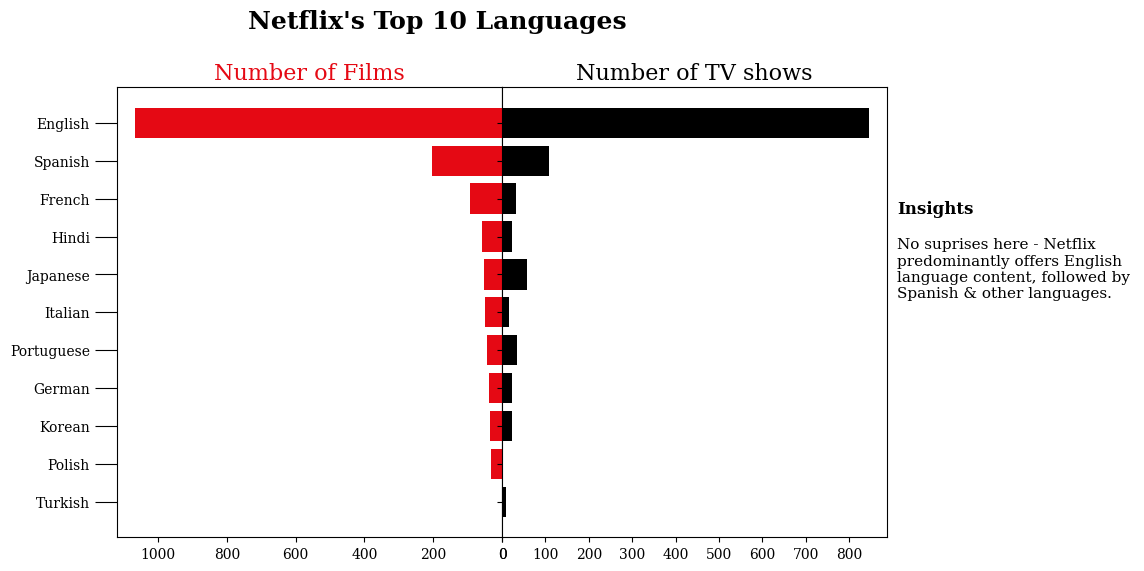

In [22]:
fig, axes = plt.subplots(figsize=(10,6), ncols=2, sharey=True)

index = netflix_data.index
n_col0 = netflix_data['film_count']
n_col1 = netflix_data['tv_count']

axes[0].set(yticks=netflix_data.index, yticklabels=netflix_data.language)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='black', size=16)

axes[0].barh(index, n_col0, align='center', color='#E50914', zorder=10)
axes[0].set_title('Number of Films', fontsize=16, color='#E50914')
axes[1].barh(index, n_col1, align='center', color='black', zorder=10)
axes[1].set_title('Number of TV shows', fontsize=16, color='black')

axes[0].invert_xaxis() 
plt.gca().invert_yaxis()
plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
plt.rcParams['font.family'] = 'serif'

fig.suptitle("Netflix's Top 10 Languages", fontsize=18, fontweight='bold', color='black', ha='center')
fig.text(0.96, 0.64, "Insights", fontsize=12, fontweight='bold' )
fig.text(0.96, 0.50,
         '''No suprises here - Netflix
predominantly offers English 
language content, followed by 
Spanish & other languages. ''', fontsize=11)

del index, n_col0, n_col1, fig, axes

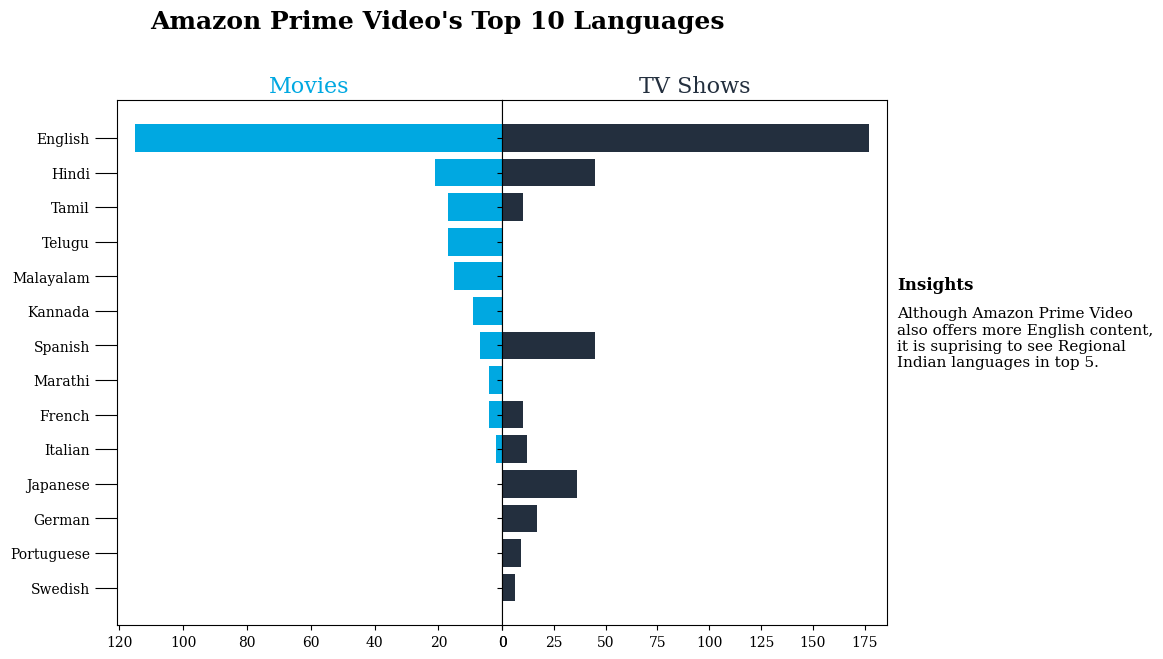

In [64]:
fig, axes = plt.subplots(figsize=(10,7), ncols=2, sharey=True)

index_amazon = amazon_data.index
a_col0 = amazon_data['film_count']
a_col1 = amazon_data['tv_count']

axes[0].set(yticks=amazon_data.index, yticklabels=amazon_data.language)
axes[0].yaxis.tick_left()
axes[0].tick_params(axis='y', colors='black', size=16)

axes[0].barh(index_amazon, a_col0, align='center', color='#00A8E1')
axes[0].set_title('Movies', fontsize=16, color='#00A8E1')
axes[1].barh(index_amazon, a_col1, align='center', color='#232F3E')
axes[1].set_title('TV Shows', fontsize=16, color='#232F3E')

axes[0].invert_xaxis()
plt.gca().invert_yaxis()

plt.subplots_adjust(wspace=0, top=0.85, bottom=0.1, left=0.18, right=0.95)
plt.rcParams['font.family'] = 'serif'

fig.suptitle("Amazon Prime Video's Top 10 Languages", fontsize=18, fontweight='bold', color='black', ha='center')
fig.text(0.96, 0.58, "Insights", fontsize=12, fontweight='bold' )
fig.text(0.96, 0.47,
         '''Although Amazon Prime Video
also offers more English content,
it is suprising to see Regional
Indian languages in top 5.''', fontsize=11)

del index_amazon, a_col0, a_col1, fig, axes

### f. Language Distribution in Amazon Prime Video 

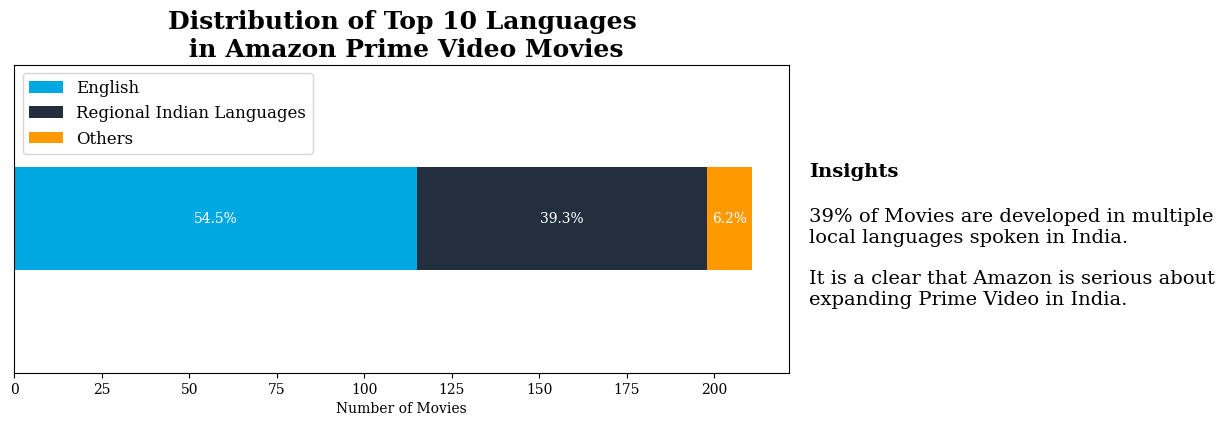

In [24]:
amazon_data2 = pd.DataFrame({'English' : [115],'Regional Indian Languages' : [83], 'Others' : [13]})
n_total = amazon_data2.loc[0,:].sum()
bar_labels = 100*[amazon_data2.iloc[0,0]/n_total, amazon_data2.iloc[0,1]/n_total, amazon_data2.iloc[0,2]/n_total]

fig, ax = plt.subplots(figsize=(10, 4))
amazon_data2.plot.barh(stacked=True, width=0.25, color=['#00A8E1', '#232F3E', '#ff9900'], ax=ax)

# Add text labels to each stacked bar
for i, patch in enumerate(ax.patches):
    ax.text(patch.get_x() + patch.get_width() / 2,
            patch.get_y() + patch.get_height() / 2,
            '{:.1%}'.format(bar_labels[i]),
            color='white', ha='center', va='center')

ax.set_title("Distribution of Top 10 Languages\n in Amazon Prime Video Movies", fontfamily='serif', fontsize=18, fontweight='bold')
ax.set_xlabel("Number of Movies")
ax.set_yticks([])
ax.legend(loc='upper left', fontsize=12)


fig.text(0.92, 0.60, "Insights", fontfamily='serif', fontweight='bold', fontsize=14)
fig.text(0.92, 0.28, 
         '''39% of Movies are developed in multiple
local languages spoken in India.

It is a clear that Amazon is serious about
expanding Prime Video in India. ''',  fontfamily='serif', fontsize=14)
fig.subplots_adjust(wspace=0.4)

del amazon_data2, ax, fig, n_total, bar_labels

### g. Current Statuses of TV Shows

In [25]:
amazon_data = all_tvshows_amazon[['Title', 'Premiere', 'Seasons', 'Status']]
netflix_data = netflix_og_tvshows[['Title', 'Premiere', 'Finale', 'Seasons']]

In [26]:
def modify_show_status(df, col_name, substrings):
    new_col = []
    for index, row in df.iterrows():
        match_found = False
        for substring in substrings:
            if substring in str(row[col_name]).strip().lower():
               new_col.append(substring)
               match_found = True
               break
        if not match_found:
            new_col.append(None)
    return new_col

substrings_to_search = ['ended', 'final season', 'miniseries', 'pending', 'renewed', 'ongoing']
output = modify_show_status(amazon_data, 'Status', substrings_to_search)


In [ ]:
amazon_data['Status_new'] = output
# original status is nan, but there is a season entry -> ongoing
# 23,24,25, 205 
# the remaining rows are moved to Hotsar, so we will not include them in our analysis
amazon_data.iloc[23,4] = 'ongoing'
amazon_data.iloc[24,4] = 'ongoing'
amazon_data.iloc[25,4] = 'ongoing'
amazon_data.iloc[205,4] = 'ongoing'

amazon_data = amazon_data.dropna(subset='Status_new')

In [28]:
# Let us limit the Status categories to ended and going
def update_show_status(df, col_name, substrings):
    new_col = []
    for index, row in df.iterrows():
        match_found = False
        for substring in substrings:
            if substring in str(row[col_name]):
               new_col.append('ongoing')
               match_found = True
               break
        if not match_found:
            new_col.append(row[col_name])
    return new_col

# substrings_to_search = ['final season', 'miniseries']
# amazon_data['Status_new'] = update_show_status(amazon_data, 'Status_new', substrings_to_search)

substrings_to_search = ['pending', 'renewed']
amazon_data['Status_new'] = update_show_status(amazon_data, 'Status_new', substrings_to_search)

del substrings_to_search

In [29]:
amazon_data = amazon_data.drop(['Status'], axis=1)
amazon_data = amazon_data.rename(columns={'Status_new': 'Status'})

amazon_tv_status = amazon_data.groupby('Status')['Title'].count().to_frame()

In [ ]:
# Lets us now clean the netflix_data,
# If there's an entry in the Finale column then we will considered the status of that show as ended,
# otheriwse we will check the Seasons column, if it is NaN then status = ended, othwerise it will be ongoing

def classify_status(df, col1, col2):
    new_col = []
    for index, row in df.iterrows():
        if row[col1] and not pd.isna(row[col1]):
            new_col.append('ended')
        else:
            if row[col2] and not pd.isna(row[col2]):
                new_col.append('ongoing')
            else:
                new_col.append('ended')
    return new_col

output = classify_status(netflix_data, 'Finale', 'Seasons')
netflix_data['Status_new'] = output

netflix_tv_status = netflix_data.groupby('Status_new')['Title'].count().to_frame()


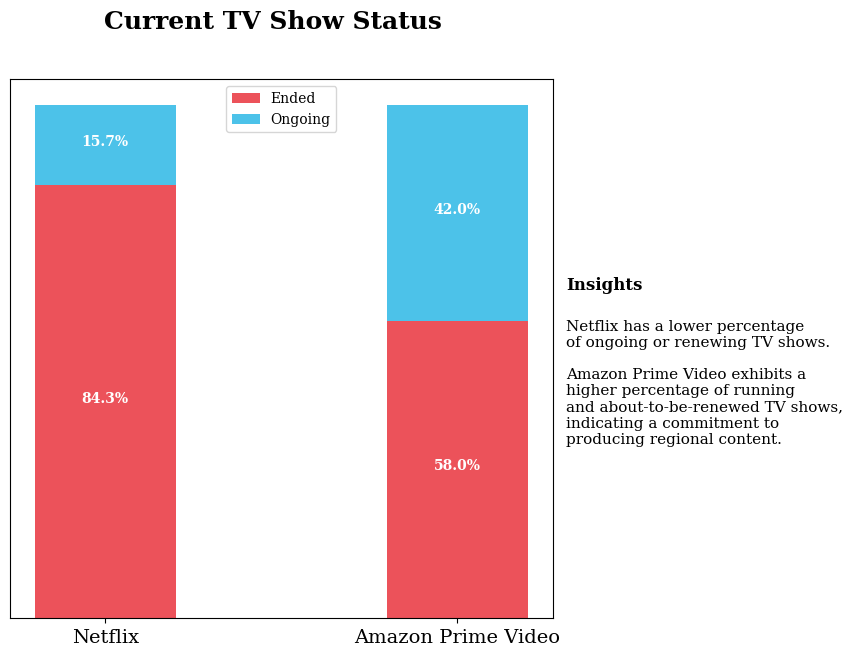

In [69]:
# Data
df = pd.DataFrame({'Netflix': [1049, 195], 'Amazon Prime Video': [222, 161]})
n_total = df['Netflix'].sum()
a_total = df['Amazon Prime Video'].sum()
df['Netflix'] = (df['Netflix']/n_total)*100
df['Amazon Prime Video'] = (df['Amazon Prime Video']/a_total)*100

groups = df.columns
values1 = df.iloc[0,:]
values2 = df.iloc[1,:]

fig, ax = plt.subplots(figsize=(7, 7))

# Stacked bar chart
ax.bar(groups, values1, label = "Ended", color='#E50914', alpha=0.7, width=0.4)
ax.bar(groups, values2, bottom = values1, label = "Ongoing", color='#00A8E1', alpha=0.7, width=0.4)

# Labels
for bar in ax.patches:
  ax.text(bar.get_x() + bar.get_width() / 2,
          bar.get_height() / 2 + bar.get_y(),
          f"{bar.get_height():.1f}%", ha = 'center',
          color = 'w', weight = 'bold', size = 10)

ax.legend(loc='upper center')
ax.set_yticks([])
ax.tick_params(axis='x', labelsize=14)
plt.rcParams['font.family'] = 'serif'

fig.suptitle("Current TV Show Status", fontsize=18, fontweight='bold', color='black', ha='center')
fig.text(0.92, 0.58, "Insights", fontsize=12, fontweight='bold' )
fig.text(0.92, 0.36,
         '''Netflix has a lower percentage
of ongoing or renewing TV shows.

Amazon Prime Video exhibits a 
higher percentage of running
and about-to-be-renewed TV shows,
indicating a commitment to
producing regional content.''', fontsize=11)

del groups, values1, values2, fig, ax, df, n_total, a_total

## Conclusion
The analysis reveals several key findings regarding the original content of Netflix and Amazon Prime Video.  

Netflix dominates in terms of volume of original content, while Amazon Prime Video focuses more on TV shows.  
It is worth considering that Netflix, being a more established platform, has had a longer time frame to produce and accumulate a larger volume of original content compared to Amazon Prime Video.  

Comedy emerges as the top genre on both platforms. Notably, Stand-up comedy, an unconventional genre in traditional cinema, ranks in the top five genres, indicating a surge in its popularity.  

English remains the most popular language on both Netflix and Amazon Prime Video.  
However, Amazon Prime Video demonstrates an expansion in the Indian market, featuring regional Indian languages in its top five languages, accounting for 39% of its movies.  

Netflix's sole focus on the streaming business allows it to prioritize and invest heavily in original content.  
On the other hand, as a subsidiary of Amazon, the strategies of Amazon Prime Video may be influenced by the existing market share and overall goals of its parent company.  

These findings provide a comprehensive understanding of the content landscapes of both platforms, aiding in the evaluation of their strategies and future prospects.